# RNN  Model

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

Import the dataset

In [2]:
weather_data = pd.read_csv('preprocessed_weather.csv')

Display the first few rows of the data

In [4]:
weather_data.head()

,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,year,month
0,30.0,22.7,26.1,34.4,25.2,29.2,20.92,5.975637,8.762524,11.7,27.4,20.0,4.58,7.0,79.899994,16.0,2010,1
1,29.9,23.5,26.2,33.8,26.2,29.8,17.71,0.100000,1.000000,13.0,27.0,24.0,3.84,7.0,79.899994,16.0,2010,1
2,29.5,23.2,26.0,34.3,26.3,29.9,17.76,0.600000,3.000000,12.3,27.4,16.0,3.65,7.0,79.899994,16.0,2010,1
3,28.9,21.9,25.3,31.6,23.4,27.8,16.50,5.975637,8.762524,17.0,34.6,356.0,3.79,7.0,79.899994,16.0,2010,1
4,28.1,21.3,24.5,30.1,23.1,26.1,23.61,5.975637,8.762524,18.7,37.1,355.0,4.97,7.0,79.899994,16.0,2010,1


Selecting relevant features

In [5]:
features = ['temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
            'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean',
            'shortwave_radiation_sum', 'precipitation_hours', 'windspeed_10m_max', 'windgusts_10m_max',
            'winddirection_10m_dominant', 'et0_fao_evapotranspiration', 'year', 'month']
target = 'precipitation_sum'

Normalize the feature values

In [6]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(weather_data[features + [target]])


Create sequences

In [7]:
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length, :-1])
        labels.append(data[i + sequence_length, -1])
    return np.array(sequences), np.array(labels)

sequence_length = 30  # example window size of 30 days
X, y = create_sequences(scaled_data, sequence_length)


Splitting into training and testing sets

In [8]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Build RNN

In [ ]:
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
model.add(Dense(1))

Compile Model

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

Train Model

In [21]:
history = model.fit(X_train, y_train, epochs=100, batch_size=40, validation_data=(X_test, y_test))

Epoch 1/100
1775/1775 [==============================] - 9s 5ms/step - loss: 0.0397 - val_loss: 0.0425
Epoch 2/100
1775/1775 [==============================] - 9s 5ms/step - loss: 0.0392 - val_loss: 0.0423
Epoch 3/100
1775/1775 [==============================] - 9s 5ms/step - loss: 0.0389 - val_loss: 0.0409
Epoch 4/100
1775/1775 [==============================] - 9s 5ms/step - loss: 0.0386 - val_loss: 0.0416
Epoch 5/100
1775/1775 [==============================] - 8s 5ms/step - loss: 0.0384 - val_loss: 0.0400
Epoch 6/100
1775/1775 [==============================] - 9s 5ms/step - loss: 0.0379 - val_loss: 0.0400
Epoch 7/100
1775/1775 [==============================] - 8s 5ms/step - loss: 0.0374 - val_loss: 0.0405
Epoch 8/100
1775/1775 [==============================] - 9s 5ms/step - loss: 0.0373 - val_loss: 0.0405
Epoch 9/100
1775/1775 [==============================] - 8s 5ms/step - loss: 0.0372 - val_loss: 0.0426
Epoch 10/100
1775/1775 [==============================] - 10s 5ms/step - 

1775/1775 [==============================] - 8s 5ms/step - loss: 0.0319 - val_loss: 0.0412
Epoch 80/100
1775/1775 [==============================] - 10s 5ms/step - loss: 0.0319 - val_loss: 0.0372
Epoch 81/100
1775/1775 [==============================] - 8s 5ms/step - loss: 0.0317 - val_loss: 0.0388
Epoch 82/100
1775/1775 [==============================] - 10s 6ms/step - loss: 0.0320 - val_loss: 0.0399
Epoch 83/100
1775/1775 [==============================] - 9s 5ms/step - loss: 0.0318 - val_loss: 0.0375
Epoch 84/100
1775/1775 [==============================] - 9s 5ms/step - loss: 0.0316 - val_loss: 0.0378
Epoch 85/100
1775/1775 [==============================] - 9s 5ms/step - loss: 0.0317 - val_loss: 0.0394
Epoch 86/100
1775/1775 [==============================] - 8s 5ms/step - loss: 0.0318 - val_loss: 0.0386
Epoch 87/100
1775/1775 [==============================] - 10s 5ms/step - loss: 0.0319 - val_loss: 0.0371
Epoch 88/100
1775/1775 [==============================] - 9s 5ms/step - lo

Evaluate the model

In [22]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

555/555 [==============================] - 1s 2ms/step


Print evaluation metrics

In [23]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.03770828978615929
Mean Absolute Error: 0.15110067445379025


Plot training and validation loss

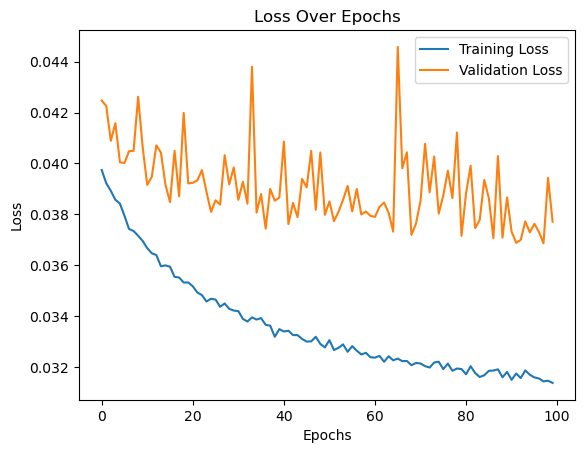

In [24]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()